In [65]:
from sklearn import datasets
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [66]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [67]:
embedding = Isomap(n_components=2)
X = embedding.fit_transform(X)
print(X.shape)

/home/lore/anaconda3/envs/astrostatistics/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/lore/anaconda3/envs/astrostatistics/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


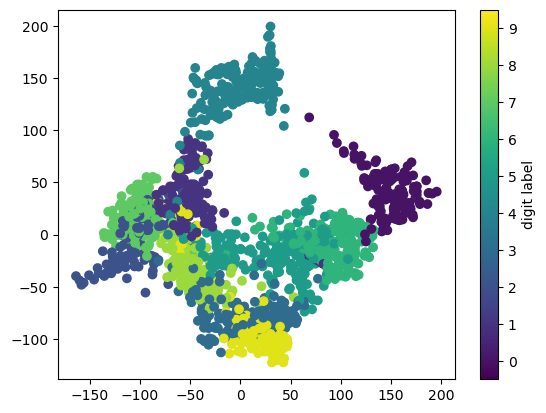

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

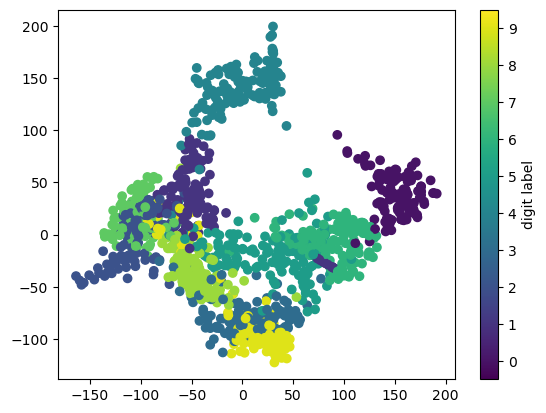

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [77]:
clf = LogisticRegression(solver='sag', penalty='l2', max_iter=20000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=20000, solver='sag')

In [78]:
print('Accuracy: ', clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6972222222222222
[[37  0  0  0  1  0  0  0  0  0]
 [ 0 26  0  0  1  0  4  0  1  0]
 [ 0  1 16  0  0  0  0 16  2  0]
 [ 0  0  0 14  0  5  0  0  3 19]
 [ 0  1  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 21 12  0  5  0]
 [ 0  2  0  0  0  0 37  0  0  0]
 [ 0  0 13  0  0  0  0 18  3  0]
 [ 0  2  0  1  0  2  0  0 21  1]
 [ 0  5  1  7  0  0  0  0  1 21]]
